# Gaussian Mixtures
#### Dano Gillam

In [1]:
from __future__ import division
import numpy.random as random
import numpy as np
from scipy.stats import multivariate_normal as normal
from scipy import linalg as la
from matplotlib import pyplot as plt
import scipy
%matplotlib inline
pdf = normal.pdf

## My Methods

In [2]:
def EM_GMM(data,iters,init_lam,init_c,init_sig):
    m=len(data) #m is the number of data points
    d = 1       #dimension of our problem
    k = len(init_lam)#k is the number of humps gaussians we are looking for
    lams = np.zeros((iters,k)) ;lams[0]=init_lam
    cs   = np.zeros((iters,k)) ;  cs[0]=init_c
    sigs = np.zeros((iters,k)) ;sigs[0]=init_sig
    
    def Z(X,lam,c,sig):
        z = 0
        for j in xrange(k):
            z += normal.pdf(X, c[j],sig[j])
        return z
            
    def w(j,X,lam,c,sig): #return probability of Y=j given X and theta
        return (lam[j]) * normal.pdf(X,c[j],sig[j]) / Z(X,lam,c,sig)  #return probability of X given Y=j
        
    def update_theta(lam,c,sig): 
        new_lam = np.zeros(k)
        new_c = np.zeros(k);#print new_c
        new_sig = np.zeros(k)
        for j in xrange(k):
            #new lam
            for i in xrange(m):
                new_lam[j] += w(j,data[i],lam,c,sig)
            new_lam[j] /= m
            #new c
            c_denom = 0
            for i in xrange(m):
                c_denom += w(j,data[i],lam,c,sig)
                new_c[j] += w(j,data[i],lam,c,sig) * data[i]
                #print new_c
            new_c[j] /= c_denom
            #new sig
            sig_denom = 0
            for i in xrange(m):
                sig_denom += w(j,data[i],lam,c,sig) 
                new_sig[j] += w(j,data[i],lam,c,sig) * (data[i]-new_c[j])**2#the norm isn't used
            new_sig[j] /= sig_denom*d      
        return new_lam,new_c,new_sig
        
    for it in xrange(1,iters):
        print '\rit:',it+1,'/',iters,
        lams[it], cs[it], sigs[it] = update_theta(lams[it-1], cs[it-1], sigs[it-1]) 
    return lams,cs,sigs

In [3]:
'''construct our practice data'''
def generate_gmm_data(n, lam, means, sigs):
    data = []
    for trial in xrange(n):
        i = random.choice(4,p=lam)
        data.append(normal.rvs(mean=means[i], cov=sigs[i]))
    return np.array(data)

In [4]:
def plot_actual_vs_estimated(d, actual_lams, actual_means, actual_sigs, estimated_lams, estimated_means, estimated_sigs):
    #Plot actual
    avg_mean = np.mean(actual_means)
    avg_sig = np.mean(actual_sigs)
    PLOTTING_DEV = 6.0
    x = np.linspace(avg_mean - PLOTTING_DEV * avg_sig, avg_mean + avg_sig * PLOTTING_DEV, 500)
    
    cumulative_norm = np.zeros_like(x)
    for i in xrange(len(actual_lams)):
        norm = scipy.stats.norm(loc=actual_means[i], scale=actual_sigs[i])
        plt.plot(x, norm.pdf(x)*actual_lams[i], label="PDF " + str(i))
        cumulative_norm += actual_lams[i]*norm.pdf(x)
    plt.plot(x, cumulative_norm, label="Cumulative PDF")
    plt.title("Actual Gaussian Distributions")
    plt.show()
    cumulative_norm_estimate= np.zeros_like(x)
    
    for i in xrange(len(estimated_lams)):
        norm = scipy.stats.norm(loc=estimated_means[i], scale=estimated_sigs[i])
        plt.plot(x, norm.pdf(x)*estimated_lams[i], label="PDF " + str(i))
        cumulative_norm_estimate += estimated_lams[i]*norm.pdf(x)
    plt.plot(x, cumulative_norm_estimate, label="Cumulative PDF")
    plt.title("Estimated Gaussian Distributions")
    plt.show()
    

## Experiment 1

it: 4 / 4

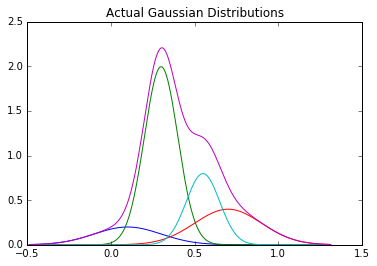

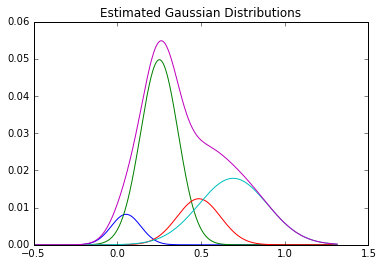

In [5]:
n = 4
actual_lams = [.1, .5, .2, .2]
actual_means = [.1, .3, .7, .55]
actual_sigs = [.2, .1, .2, .1]
lams0  = np.random.rand(n)
means0 = np.array([.1,.4,.7,.9])
sigs0  = np.array([.15,.15,.15,.15])
D = generate_gmm_data(100, actual_lams, actual_means, actual_sigs)

lams,cs,sigs =  EM_GMM(D, n, lams0,means0,sigs0 )
plot_actual_vs_estimated(D, actual_lams, actual_means, actual_sigs, lams[-1], cs[-1], sigs[-1])